<a href="https://colab.research.google.com/github/Rioba-Ian/Algorithmic-Trading/blob/main/Estimation_of_VaR_ETFs_iShares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
from matplotlib.pyplot import figure

In [ ]:
from pandas_datareader import DataReader 

from datetime import datetime

In [ ]:
#set teh start and end date for the data to be scraped
start = datetime(2019,1,1)
end = datetime(2020,12,31)

etf = ['HYG','LQD']

#a for loop for getting the data from google finance data as a dataframe
#set dataframe as the stockticker

for x in etf:
    globals()[x] = DataReader(x, 'yahoo', start,end)['Adj Close']
## We used yahoo since google got deprecated

In [ ]:
HYG.head()

Date
2019-01-02    72.621437
2019-01-03    72.657288
2019-01-04    73.876778
2019-01-07    74.594101
2019-01-08    75.078308
Name: Adj Close, dtype: float64

In [ ]:
LQD.head()

Date
2019-01-02    105.958740
2019-01-03    106.005577
2019-01-04    105.940033
2019-01-07    105.949409
2019-01-08    106.183479
Name: Adj Close, dtype: float64

In [ ]:
HYG.describe()

count    505.000000
mean      80.125183
std        3.248366
min       65.308014
25%       78.284271
50%       80.541023
75%       82.486397
max       86.671867
Name: Adj Close, dtype: float64

In [ ]:
LQD.describe()

count    505.000000
mean     123.386788
std        8.986575
min      102.312820
25%      117.321404
50%      123.352081
75%      132.494400
max      137.577667
Name: Adj Close, dtype: float64

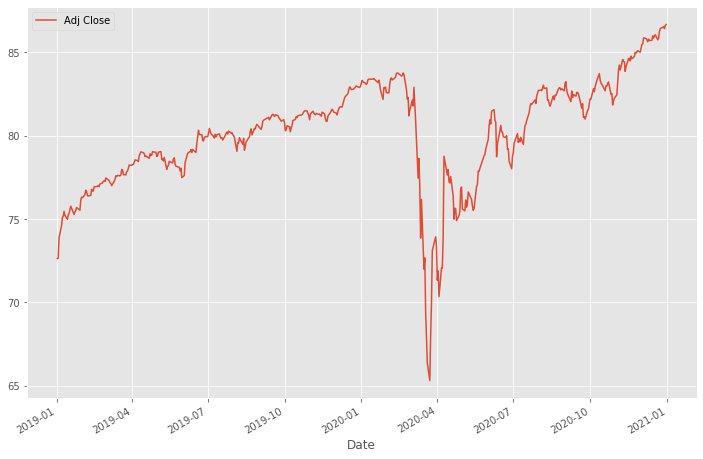

In [ ]:
HYG.plot(legend=True, figsize=(12,8))

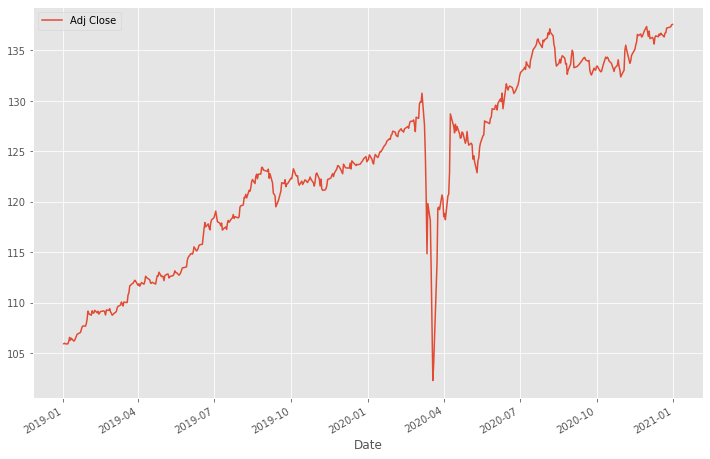

In [ ]:
LQD.plot(legend=True, figsize=(12,8))

In [ ]:
# set the investment weights 
weights = np.array([1/3, 2/3])

# set the initial investment level
initial_investment = 300000000

In [ ]:
# Periodic returns 

etfs = DataReader(etf, 'yahoo', start, end)['Adj Close']

etfs

Symbols,HYG,LQD
Date,,
2019-01-02,72.621437,105.958740
2019-01-03,72.657288,106.005577
2019-01-04,73.876778,105.940033
2019-01-07,74.594101,105.949409
2019-01-08,75.078308,106.183479
...,...,...
2020-12-24,86.423676,137.219101
2020-12-28,86.532883,137.308731
2020-12-29,86.423676,137.368500


In [ ]:
returns_etfs = etfs.pct_change()
returns_etfs

Symbols,HYG,LQD
Date,,
2019-01-02,NaN,NaN
2019-01-03,0.000494,0.000442
2019-01-04,0.016784,-0.000618
2019-01-07,0.009710,0.000089
2019-01-08,0.006491,0.002209
...,...,...
2020-12-24,0.002072,0.003423
2020-12-28,0.001264,0.000653
2020-12-29,-0.001262,0.000435


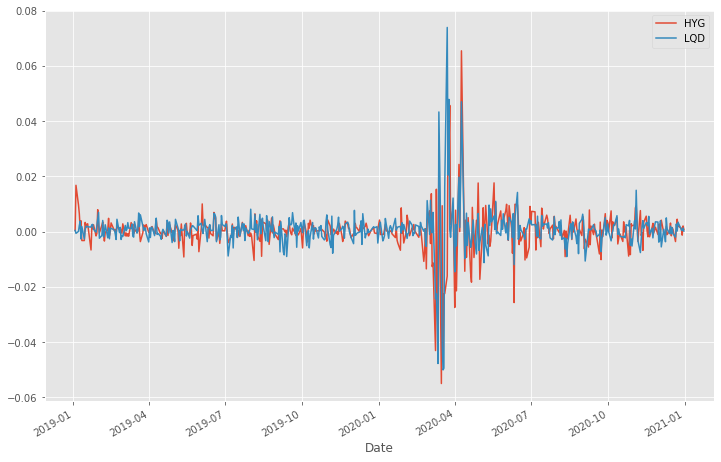

In [ ]:
returns_etfs['HYG'].plot(figsize=(12,8), legend=True)
returns_etfs['LQD'].plot(figsize=(12,8), legend=True)

In [ ]:
print(returns_etfs.mean())

Symbols
HYG    0.000383
LQD    0.000549
dtype: float64


In [ ]:
print(returns_etfs.std())

Symbols
HYG    0.008006
LQD    0.007842
dtype: float64


In [ ]:
sd_hyg = returns_etfs.std()[0]
sd_lqd = returns_etfs.std()[1]

In [ ]:
import scipy.stats

In [ ]:
def VaR(Position, sigma, Quantile):
    return Position * sigma * scipy.stats.norm.ppf(Quantile)

1 day VaR @ 99% confidence: 1862561.7
2 day VaR @ 99% confidence: 2634060.02
3 day VaR @ 99% confidence: 3226051.5
4 day VaR @ 99% confidence: 3725123.4
5 day VaR @ 99% confidence: 4164814.58
6 day VaR @ 99% confidence: 4562325.78
7 day VaR @ 99% confidence: 4927875.06
8 day VaR @ 99% confidence: 5268120.04
9 day VaR @ 99% confidence: 5587685.1
10 day VaR @ 99% confidence: 5889937.26


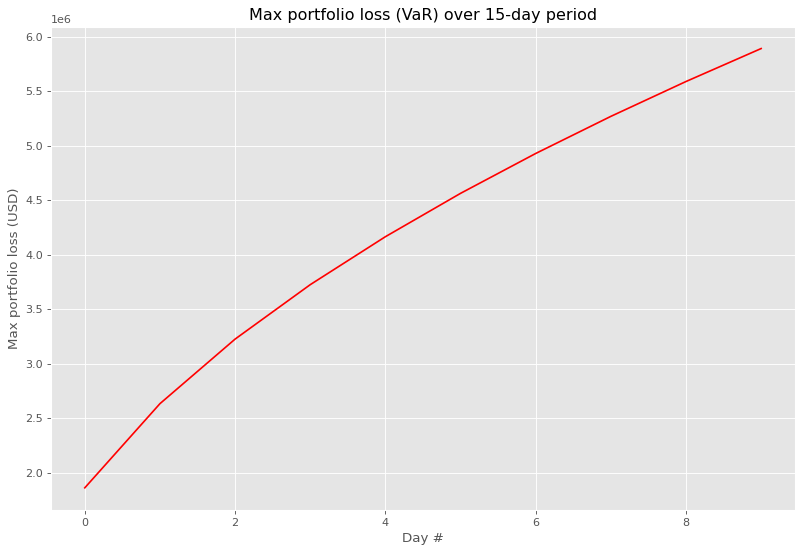

In [ ]:
# var for hyg only
var1_hyg = VaR(10**8, sd_hyg, 0.99)
# 10 day Var
var_arr = []

num_days = int(10)

for x in range(1, num_days+1):
    var_arr.append(np.round(var1_hyg * np.sqrt(x),2))
    print(str(x) + " day VaR @ 99% confidence: " + str(np.round(var1_hyg*np.sqrt(x), 2)))

# Plotting
figure(figsize=(12,8), dpi=80)
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_arr, "r")

1 day VaR @ 99% confidence: 3648768.57
2 day VaR @ 99% confidence: 5160137.99
3 day VaR @ 99% confidence: 6319852.54
4 day VaR @ 99% confidence: 7297537.13
5 day VaR @ 99% confidence: 8158894.55
6 day VaR @ 99% confidence: 8937621.18
7 day VaR @ 99% confidence: 9653734.22
8 day VaR @ 99% confidence: 10320275.98
9 day VaR @ 99% confidence: 10946305.7
10 day VaR @ 99% confidence: 11538419.32


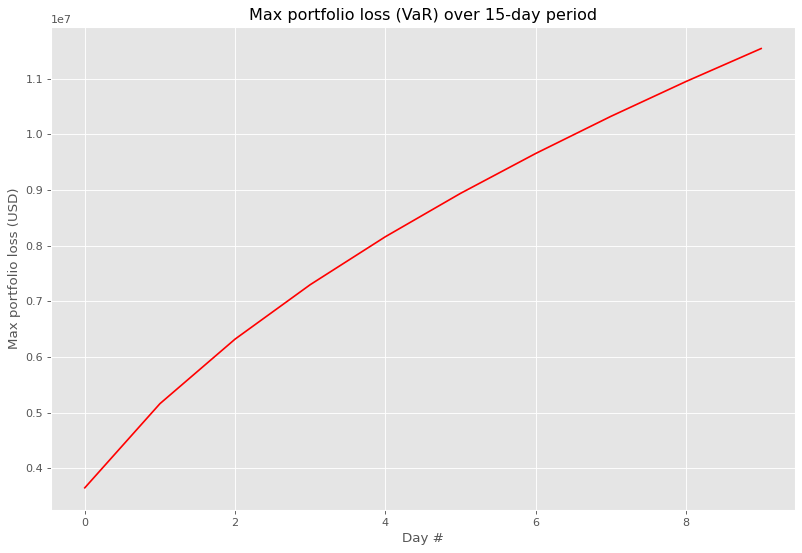

In [ ]:
# var for lqd only
var1_lqd = VaR(2*(10**8), sd_lqd, 0.99)
# 10 day Var
var_arr = []

num_days = int(10)

for x in range(1, num_days+1):
    var_arr.append(np.round(var1_lqd * np.sqrt(x),2))
    print(str(x) + " day VaR @ 99% confidence: " + str(np.round(var1_lqd*np.sqrt(x), 2)))

# Plotting
figure(figsize=(12,8), dpi=80)
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_arr, "r")

In [ ]:
# The var-cov matrix will assist us in the sd and mean of returns 
# across the entire portfolio
cov_matrix = returns_etfs.cov()
cov_matrix

Symbols,HYG,LQD
Symbols,,
HYG,0.000064,0.000032
LQD,0.000032,0.000062


In [ ]:
# calculate the mean retruns for each stock
avg_rets = returns_etfs.mean()

# calculate the mean returns for the portfolio overall,
# using the dot product in order to 
# normalize individual means against investment weights

port_mean = avg_rets.dot(weights)

# calculate portfolio sd
port_sd = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# calcualte the mean of investment 
mean_investment = (1 + port_mean) * initial_investment

# calculate the sd of investment 
sd_investment = initial_investment * port_sd

In [ ]:
# select the confidence interval 99%
conf_level1 = 0.01

# we shall use scipy in order to generate values for the 
# inverse cummulative distribution function to a normal distribution
# plug in the mean, sd of our portfolio 

from scipy.stats import norm

cutoff1 = norm.ppf(conf_level1, mean_investment, sd_investment)


In [ ]:
var_1d1 = initial_investment -cutoff1
var_1d1

4712002.53186816

1 day VaR @ 99% confidence: 4712002.53
2 day VaR @ 99% confidence: 6663777.89
3 day VaR @ 99% confidence: 8161427.79
4 day VaR @ 99% confidence: 9424005.06
5 day VaR @ 99% confidence: 10536357.97
6 day VaR @ 99% confidence: 11542001.87
7 day VaR @ 99% confidence: 12466786.88
8 day VaR @ 99% confidence: 13327555.77
9 day VaR @ 99% confidence: 14136007.6
10 day VaR @ 99% confidence: 14900660.34


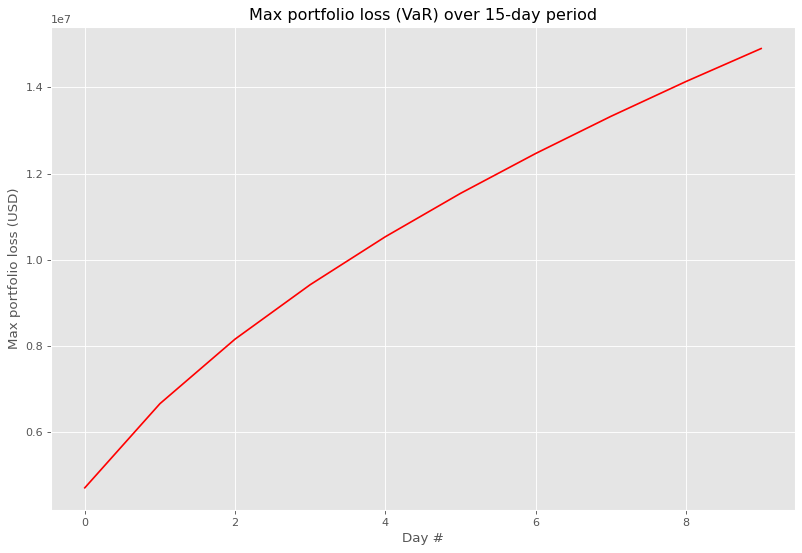

In [ ]:
# combined var for the 10 days
# 10 day Var
var_arr = []

num_days = int(10)

for x in range(1, num_days+1):
    var_arr.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 99% confidence: " + str(np.round(var_1d1*np.sqrt(x), 2)))

# Plotting
figure(figsize=(12,8), dpi=80)
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_arr, "r")

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Estimation_of_VaR_ETFs_iShares.ipynb')

--2021-03-25 14:53:02--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-03-25 14:53:02 (31.5 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Estimation_of_VaR_ETFs_iShares.ipynb to pdf
[NbConvertApp] Support files will be in Estimation_of_VaR_ETFs_iShares_files/
[NbConvertApp] Making directory ./Estimation_of_VaR_ETFs_iShares_files
[NbConvertApp] Making directory ./Estimation_of_VaR_ETFs_iShares_files
[NbConvertApp]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'